<a href="https://colab.research.google.com/github/lucianosilvacraam/astro/blob/master/Astroinform%C3%A1tica_II_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tópicos da Aula:** Construção de Modelos, Inicialização, Simulação, Dados Experimentais

In [0]:
!pip install batman-package

**Importação dos Módulos**

In [0]:
import batman
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Construção do Modelo de Trânsito**

In [0]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

**Inicialização do Modelo de Trânsito**

In [0]:
t = np.linspace(-0.05, 0.05, 100)
m = batman.TransitModel(params, t)

**Simulação do Modelo de Trânsito**

In [0]:
flux = m.light_curve(params)

**Exibição dos Resultados da Simulação**

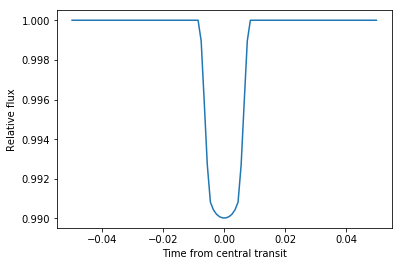

In [7]:
plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()